In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams as rcP
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# Exploring the dataset
df.shape

(13320, 9)

In [4]:
# Exploring the dataset
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# Exploring the dataset
df.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [6]:
# Exploring the dataset
df.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [7]:
# Removing the columns of society
df = df.drop('society', axis='columns')
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Data Cleaning Process

In [8]:
# Data Cleaning
# Checking the null values in the dataset
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [9]:
# Applying median to the balcony and bath column
from math import floor

balcony_median = float(floor(df.balcony.median()))
bath_median = float(floor(df.bath.median()))

df.balcony = df.balcony.fillna(balcony_median)
df.bath = df.bath.fillna(bath_median)

In [10]:
# Checking the null values in the dataset again
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [11]:
# Dropping the rows with null values because the dataset is huge as compared to null values.
df = df.dropna()
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [12]:
# Converting the size column to bhk
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop('size', axis='columns')
df.groupby('bhk')['bhk'].agg('count')

bhk
1      656
2     5528
3     4856
4     1417
5      356
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

In [13]:
# Exploring the total_sqft column
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
# Since the total_sqft contains range values such as 1133-1384, lets filter out these values
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
# Displaying all the rows that are not integers
df[~df['total_sqft'].apply(isFloat)]

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,1200 - 1470,2.0,0.0,72.760,2
13240,Super built-up Area,Ready To Move,Devanahalli,1020 - 1130,2.0,2.0,52.570,1
13265,Super built-up Area,20-Sep,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [16]:
# Converting the range values to integer values and removing other types of error
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
df['new_total_sqft'] = df.total_sqft.apply(convert_sqft_to_num)
df = df.drop('total_sqft', axis='columns')
df.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0


In [18]:
# Removing the rows in new_total_sqft column that hase None values
df.isna().sum()

area_type          0
availability       0
location           0
bath               0
balcony            0
price              0
bhk                0
new_total_sqft    46
dtype: int64

In [19]:
# Removing the rows in new_total_sqft column that hase None values
df = df.dropna()
df.isna().sum()

area_type         0
availability      0
location          0
bath              0
balcony           0
price             0
bhk               0
new_total_sqft    0
dtype: int64

## Feature Engineering

In [20]:
# Adding a new column of price_per_sqft
df1 = df.copy()

# In our dataset the price column is in Lakhs
df1['price_per_sqft'] = (df1['price']*100000)/df1['new_total_sqft']
df1.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [21]:
# Checking unique values of 'location' column
locations = list(df['location'].unique())
print(len(locations))

1298


In [22]:
# Removing the extra spaces at the end
df1.location = df1.location.apply(lambda x: x.strip())

# Calulating all the unqiue values in 'location' column
location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               538
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [23]:
# Checking locations with less than 10 values
print(len(location_stats[location_stats<=10]), len(df1.location.unique()))

1047 1287


In [24]:
df1.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [25]:
# Labelling the locations with less than or equal to 10 occurences to 'other'
locations_less_than_10 = location_stats[location_stats<=10]

df1.location = df1.location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(df1.location.unique())

241

In [26]:
# Checking the unique values in 'availability column'
df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

availability
Ready To Move    10541
18-Dec             306
18-May             294
18-Apr             271
18-Aug             199
                 ...  
16-Oct               1
16-Nov               1
16-Jul               1
16-Jan               1
14-Jul               1
Name: availability, Length: 80, dtype: int64

In [27]:
# Labelling the dates into Not Ready
dates = df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

dates_not_ready = dates[dates<10000]
df1.availability = df1.availability.apply(lambda x: 'Not Ready' if x in dates_not_ready else x)

len(df1.availability.unique())

2

In [28]:
df1.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,Not Ready,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [29]:
# Checking the unique values in 'area_type' column
df1.groupby('area_type')['area_type'].agg('count').sort_values(ascending=False)

# Since the column has only few unique values, we don't perform any operation

area_type
Super built-up  Area    8778
Built-up  Area          2402
Plot  Area              1991
Carpet  Area              86
Name: area_type, dtype: int64

## Removing Outliers

In [30]:

# Removing the rows that have 1 Room for less than 300sqft

df2 = df1[~(df1.new_total_sqft/df1.bhk<300)]
print(len(df2), len(df1))

12513 13257


In [31]:
df2.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
# Since there is a wide range for 'price_per_sqft' column with min = Rs.267/sqft till max = Rs. 127470/sqft, we remove the extreme ends using the SD
def remove_pps_outliers(df):
    
    df_out = pd.DataFrame()
    
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        sd = np.std(sub_df.price_per_sqft)
        reduce_df = sub_df[(sub_df.price_per_sqft>(m-sd)) & (sub_df.price_per_sqft<(m+sd))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    
    return df_out

df3 = remove_pps_outliers(df2)
print(len(df2), len(df3))

12513 10288


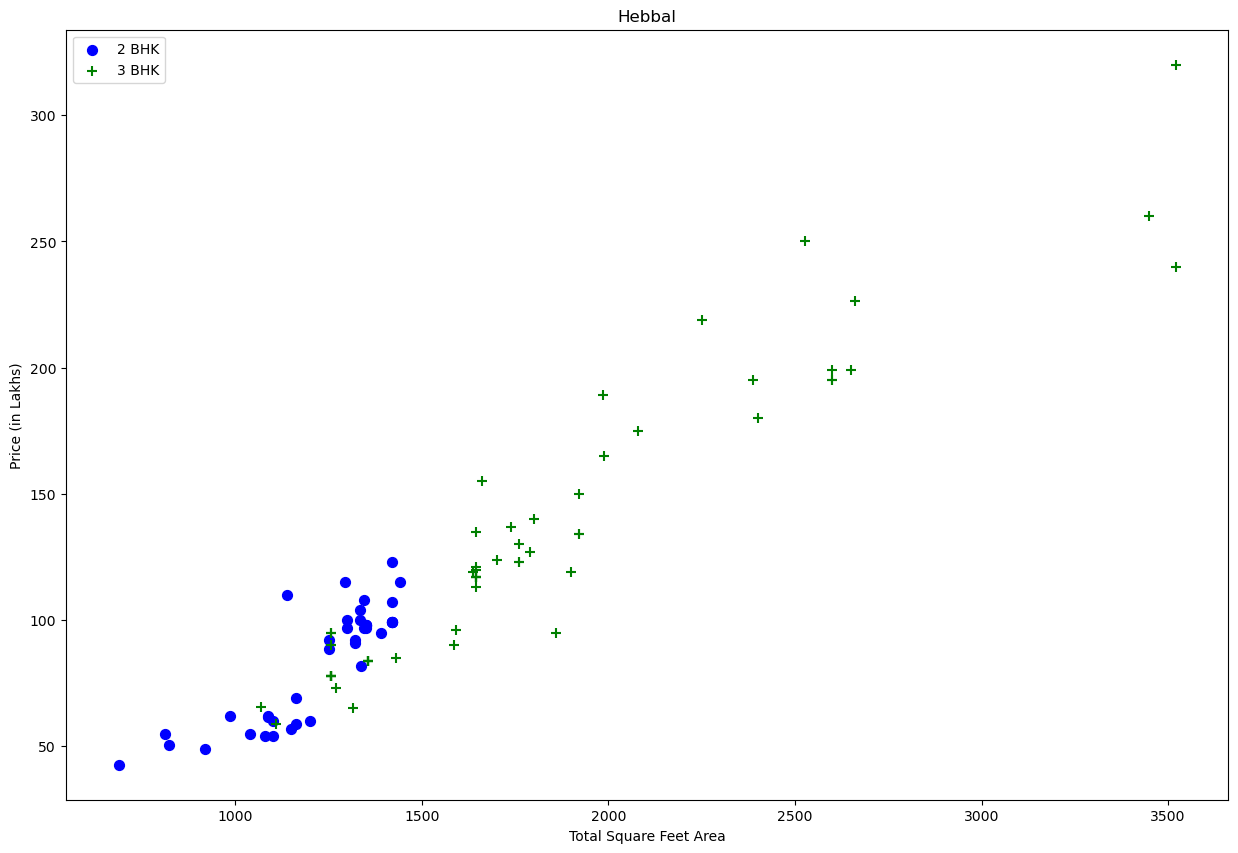

In [33]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    rcP['figure.figsize'] = (15,10)
    plt.scatter(bhk2.new_total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.new_total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (in Lakhs)')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3, 'Hebbal')

In [34]:
# Here we observe that 3 BHK cost that same as 2 BHK in 'Hebbal' location hence removing such outliers is necessary
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis='index')

df4 = remove_bhk_outliers(df3)
print(len(df3), len(df4))

10288 7342


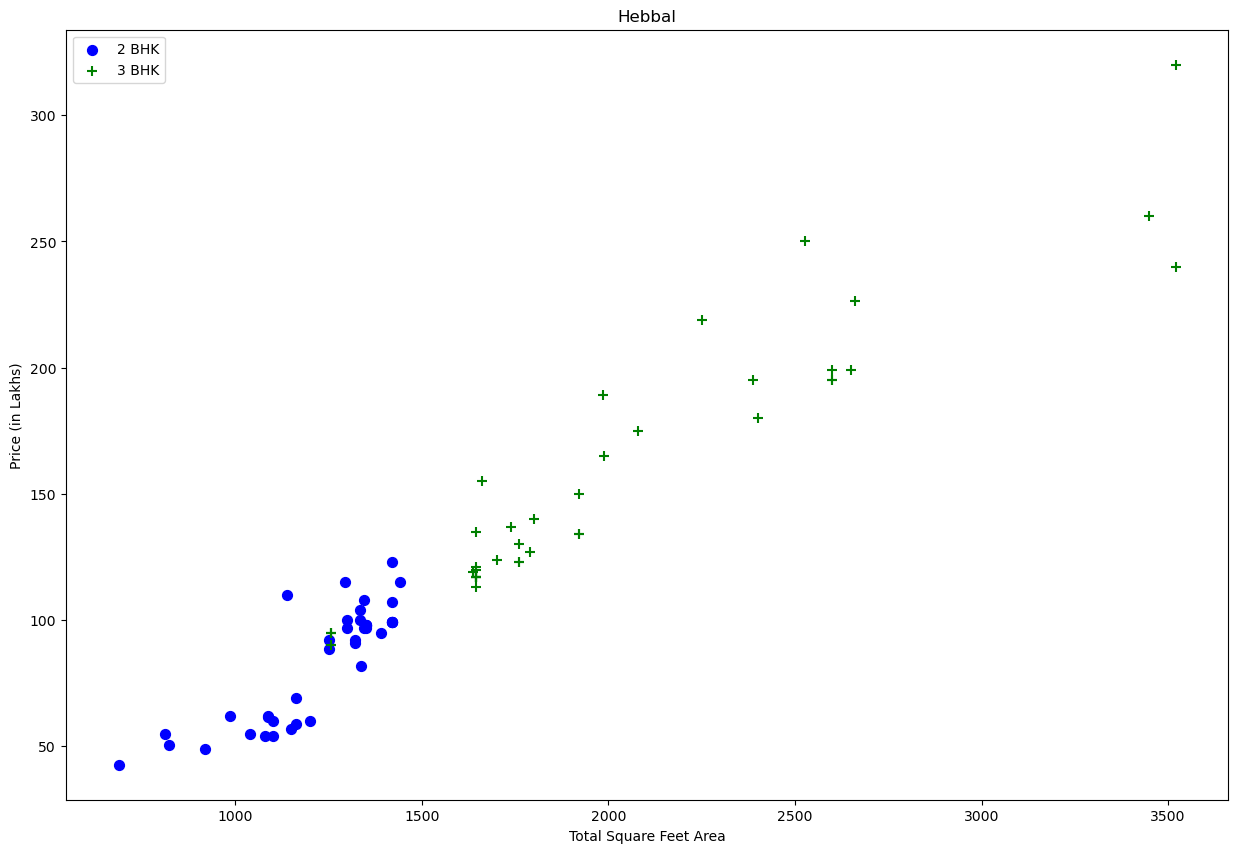

In [35]:
plot_scatter_chart(df4, 'Hebbal')

Text(0, 0.5, 'Count')

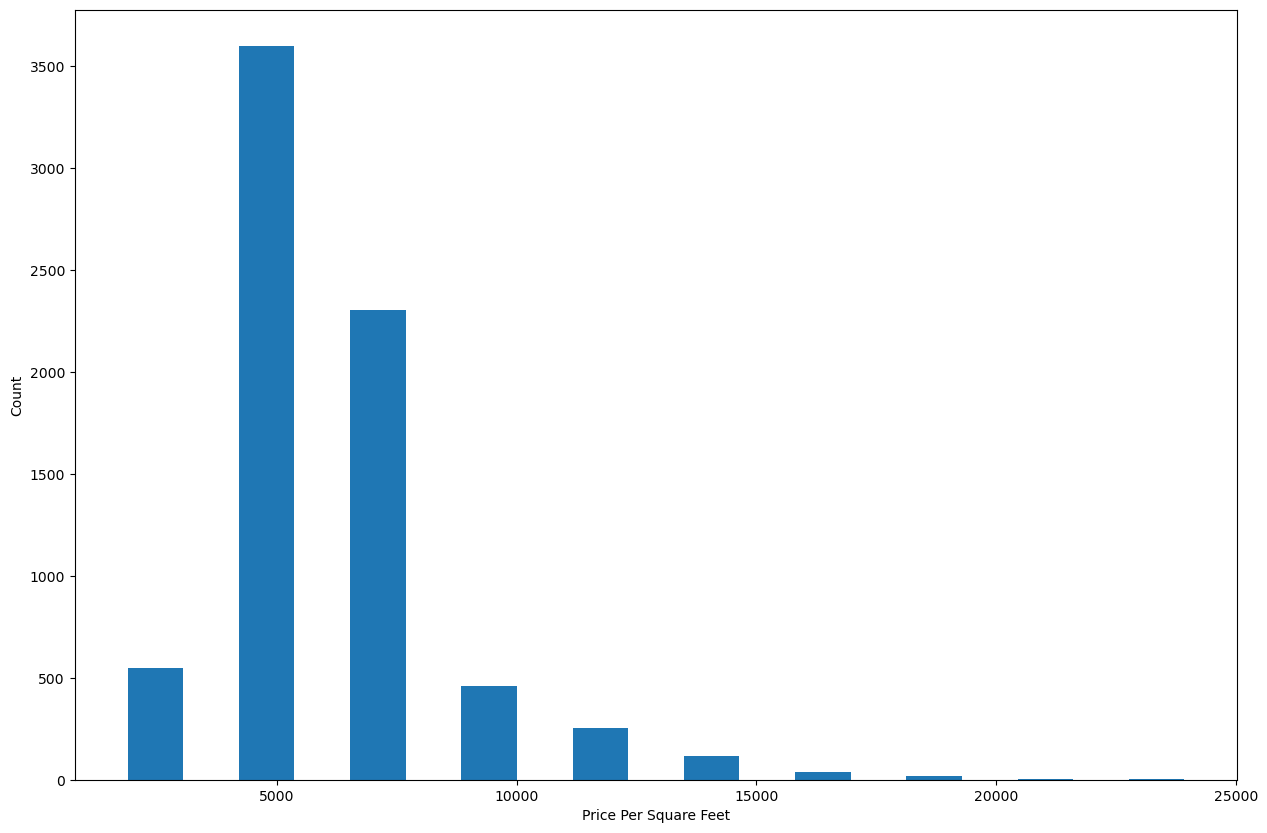

In [36]:
plt.hist(df4.price_per_sqft, rwidth=0.5)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

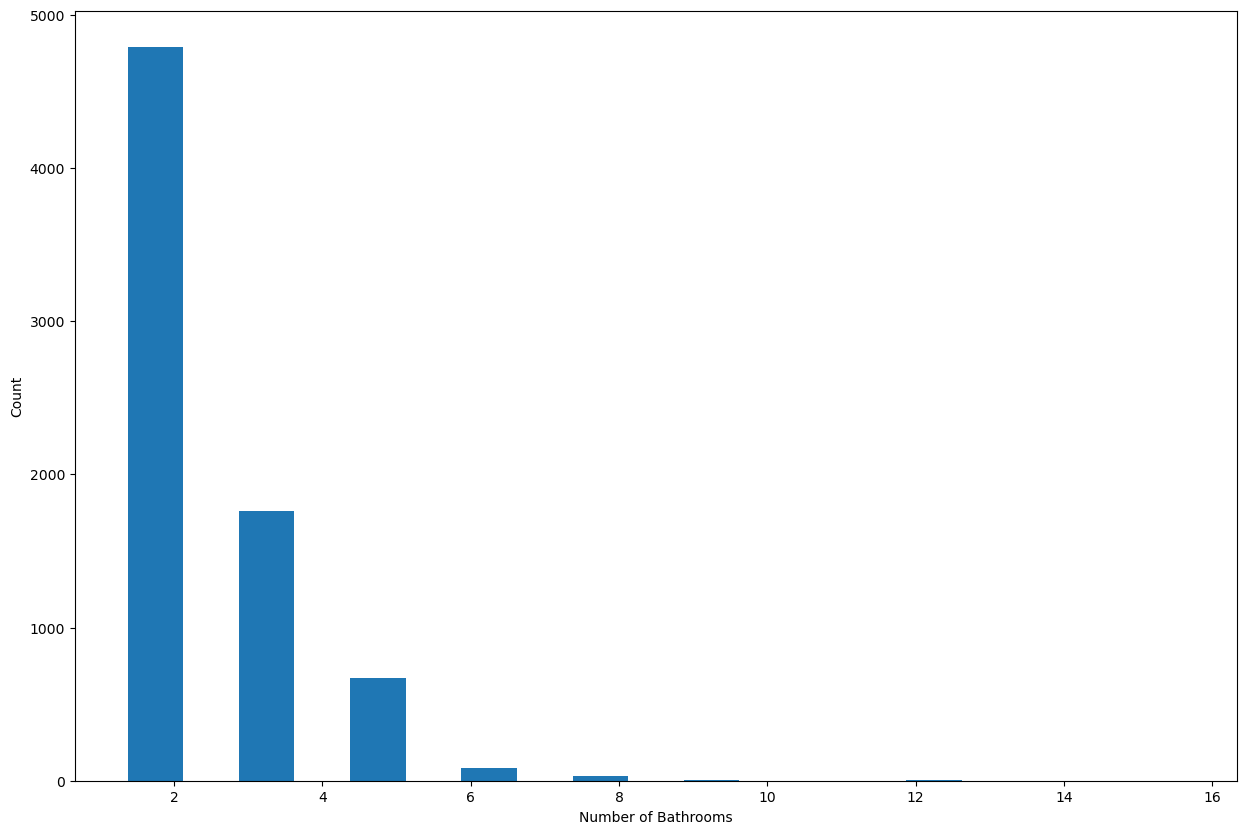

In [37]:
plt.hist(df4.bath, rwidth=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [38]:
# Removing the rows that have 'bath' greater than 'bhk'+2
df5 = df4[df4.bath<(df4.bhk+2)]
print(len(df4), len(df5))

7342 7264


In [39]:
df5.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,Not Ready,1st Block Jayanagar,4.0,1.0,428.0,4,2850.0,15017.543860
1,Super built-up Area,Not Ready,1st Block Jayanagar,3.0,2.0,194.0,3,1630.0,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,2.0,3.0,235.0,3,1875.0,12533.333333
3,Built-up Area,Not Ready,1st Block Jayanagar,2.0,0.0,130.0,3,1200.0,10833.333333
4,Super built-up Area,Not Ready,1st Block Jayanagar,2.0,2.0,148.0,2,1235.0,11983.805668


## Model Building

In [40]:
# Removing the unnecessary columns (columns that were added only for removing the outliers)
df6 = df5.copy()
df6 = df6.drop('price_per_sqft', axis='columns')

In [41]:
df6.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,Not Ready,1st Block Jayanagar,4.0,1.0,428.0,4,2850.0
1,Super built-up Area,Not Ready,1st Block Jayanagar,3.0,2.0,194.0,3,1630.0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,2.0,3.0,235.0,3,1875.0
3,Built-up Area,Not Ready,1st Block Jayanagar,2.0,0.0,130.0,3,1200.0
4,Super built-up Area,Not Ready,1st Block Jayanagar,2.0,2.0,148.0,2,1235.0


In [42]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.location).drop('other', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [43]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.availability).drop('Not Ready', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [44]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.area_type).drop('Super built-up  Area', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [45]:
df6.drop(['area_type','availability','location'], axis='columns', inplace=True)
df6.head()

,bath,balcony,price,bhk,new_total_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Ready To Move,Built-up Area,Carpet Area,Plot Area
0,4.0,1.0,428.0,4,2850.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,194.0,3,1630.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,235.0,3,1875.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2.0,0.0,130.0,3,1200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,2.0,148.0,2,1235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Size of the dataset
df6.shape

(7264, 249)

In [47]:
# Splitting the dataset into features and label
X = df6.drop('price', axis='columns')
y = df6['price']

In [48]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [62]:
# Creating a function for GridSearchCV

def find_best_model(X,y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'n_jobs': [5]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

find_best_model(X, y)

c:\Users\MOHAMMED RIZWAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MOHAMMED RIZWAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\MOHAMMED RIZWAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\MOHAMMED RIZWAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\Users\MOHAMMED RIZWAN\a

,model,best_parameters,accuracy
0,linear_regression,{'n_jobs': 5},0.820724
1,lasso,"{'alpha': 1, 'selection': 'cyclic'}",0.664476
2,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.644118


#### Since the Linear Regression has the highest accuracy, the model selected for this problem is Linear Regression

In [63]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [64]:
# Creating Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
model.score(X_test, y_test)

0.861050367531472

#### Predicting the values using our trained model

In [66]:
X.columns

Index(['bath', 'balcony', 'bhk', 'new_total_sqft', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'Ready To Move', 'Built-up  Area',
       'Carpet  Area', 'Plot  Area'],
      dtype='object', length=248)

In [67]:
# For finding the appropriate location
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

6

In [68]:
# For finding the appropriate area_type
np.where(X.columns=='Built-up  Area')[0][0]

245

In [69]:
# For finding the appropriate availability
np.where(X.columns=='Ready To Move')[0][0]

244

In [70]:
# Creating a fuction to predict values
def prediction(location, bhk, bath, balcony, sqft, area_type, availability):
    
    loc_index, area_index, avail_index = -1,-1,-1
        
    if location!='other':
        loc_index = int(np.where(X.columns==location)[0][0])
    
    if area_type!='Super built-up  Area':
        area_index = np.where(X.columns==area_type)[0][0]
        
    if availability!='Not Ready':        
        avail_index = np.where(X.columns==availability)[0][0]
            
    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = balcony
    x[2] = bhk
    x[3] = sqft
    
    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1
    if avail_index >= 0:
        x[avail_index] = 1
        
    return model.predict([x])[0]

In [71]:
# Prediction 1
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('1st Block Jayanagar', 2, 2, 2, 1000, 'Built-up  Area', 'Ready To Move')

c:\Users\MOHAMMED RIZWAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


173.59653593456585

In [72]:
# Prediction 2
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('1st Phase JP Nagar', 2, 2, 2, 1000, 'Super built-up  Area', 'Ready To Move')

c:\Users\MOHAMMED RIZWAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.43189145469185

In [73]:
# Prediction 3
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('1st Phase JP Nagar', 2, 3, 2, 2000, 'Plot  Area', 'Not Ready')

c:\Users\MOHAMMED RIZWAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


186.3262031968408